In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import prince
from scipy import stats

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale

## Base de gorriones

In [2]:
url = 'D:/Maestria Analitica de Datos/Segundo Semestre/Metodos Estadisticos/bases/birds.csv'
bird = pd.read_csv(url,index_col='Bird')
bird.head()

,Longitud Total,Extensi�n de las alas,Longitud pico y cabeza,Longitud del h�mero,Longitud de la quilla
Bird,,,,,
1,156,245,31.6,18.5,20.5
2,154,240,30.4,17.9,19.6
3,153,240,31.0,18.4,20.6
4,153,236,30.9,17.7,20.2
5,155,243,31.5,18.6,20.3


### Haga un análisis de componentes principales con la matriz de correlaciones.

In [3]:
pcab = prince.PCA(
     n_components=len(bird.columns),
     n_iter=3,
     rescale_with_mean=True,
     rescale_with_std=True,
     copy=True,
     check_input=True,
     engine='auto'
 )
pcab = pcab.fit(bird)

In [4]:
pcab.transform(bird).head()

,0,1,2,3,4
Bird,,,,,
1,-0.064955,-0.607064,0.173008,0.521171,-0.554478
2,2.202907,-0.446884,-0.404215,0.652149,-0.233471
3,1.157437,0.019454,0.683134,0.723721,-0.211036
4,2.335015,0.173775,0.309133,-0.150836,-0.483058
5,0.298100,-0.672101,0.479128,0.551519,-0.247012


### Compruebe que la suma de valores propios de la matriz de correlaciones es igual a la suma de los elementos de la diagonal (traza).

In [5]:
pcab.eigenvalues_

array([3.61597834, 0.53150408, 0.38642455, 0.30156552, 0.16452751])

In [6]:
pcab.total_inertia_

5.0

### De acuerdo a los coeficientes que definen a la primera y segunda componente se dice que la primera indica el tamaño de los pajaros y la segunda la forma. Explique.

In [7]:
def matriz_componentes(df,corr):
    cuanti=df.select_dtypes(np.number)
    nombres = cuanti.columns
    
    if corr:
        scaler=StandardScaler()
        scaler.fit(cuanti)
        X_scaled=scaler.transform(cuanti)
    else:
        scaler=StandardScaler()
        scaler.fit(cuanti)
        X_scaled=cuanti 
    
    pca=PCA(n_components=len(nombres)) 
    pca.fit(X_scaled)
    cuanti_pca=pca.transform(X_scaled)
    
    if corr:
        pca_pipe = make_pipeline(StandardScaler(), PCA())
    else:
        pca_pipe = make_pipeline(PCA())
    
    pca_pipe.fit(cuanti)
    modelo_pca = pca_pipe.named_steps['pca']
    idx =[]
    for i in range(len(nombres)):
        lb = 'PC'+str(i+1)
        idx.append(lb)
    matriz_componentes = pd.DataFrame(
        data    = modelo_pca.components_,
        columns = cuanti.columns,
        index   = idx
    )
    
    return matriz_componentes,pca.components_

In [8]:
matriz_bird, componentes_bird = matriz_componentes(bird,True)
matriz_bird

,Longitud Total,Extensi�n de las alas,Longitud pico y cabeza,Longitud del h�mero,Longitud de la quilla
PC1,-0.451799,-0.461681,-0.450542,-0.470739,-0.397675
PC2,0.050721,-0.299564,-0.324572,-0.184684,0.876489
PC3,-0.690470,-0.340548,0.454493,0.410935,0.178456
PC4,-0.420414,0.547863,-0.606296,0.388278,0.068872
PC5,0.373909,-0.530080,-0.342792,0.651667,-0.192434


In [9]:
def graf_componentes(df,corr,ancho=5,largo=4):
    cuanti=df.select_dtypes(np.number)
    nombres = cuanti.columns
    
    fig, scatter = plt.subplots(figsize = (ancho,largo))
    
    _,c = matriz_componentes(df,corr)
    
    ACP=[]
    for i in range(0, len(c)):
      x=["ACP", str(i+1)]
      a="".join(x)
      ACP.append(a)
    sns.heatmap(c,xticklabels=cuanti.columns, yticklabels=ACP, annot=True)


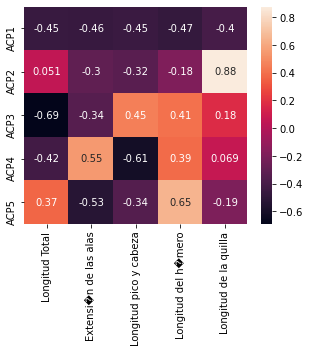

In [10]:
graf_componentes(bird,True)

### Dibuje el plano factorial (e plano de las dos primeras componentes) y resalte los primeros 21 datos en el gráfico (use otro color para graficarlos, póngales una etiqueta, dibujelos de forma separada,...), si se sabe que sobrevivieron los primeros 21 registros ¿Tiene alguna observación al respecto?

In [11]:
c = []
for i in range(49):
    if i < 22:
        c.append('red')
    else:
        c.append('blue')

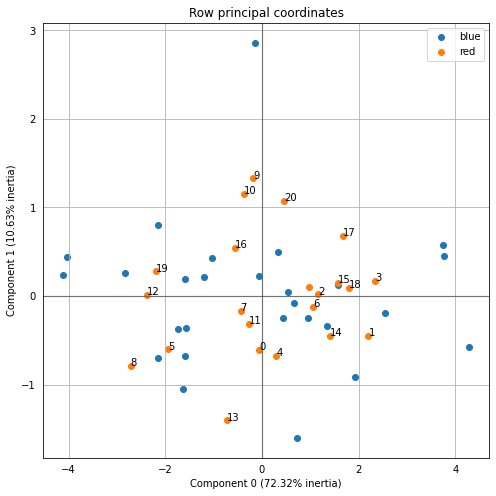

In [12]:
ax = pcab.plot_row_coordinates(
     bird,
     ax=None,
     figsize=(8, 8),
     x_component=0,
     y_component=1,
     labels=range(21),
     color_labels=c,
     ellipse_outline=False,
     ellipse_fill=False,
     show_points=True
 )

### Haga un biplot de este ejercicio.

In [13]:
def biplot(df,pcax,pcay,corr=True,mx=0,my=0):
    
    cuanti=df.select_dtypes(np.number)
    nombres = cuanti.columns
    
    labels= nombres
    
    scaler=StandardScaler()
    scaler.fit(cuanti)
    
    if corr:
        X_scaled=scaler.transform(cuanti)
    else:
        X_scaled=cuanti
    
    pca=PCA(n_components=len(nombres)) 
    pca.fit(X_scaled)
    cuanti_pca=pca.transform(X_scaled)

    if corr:
        pca_pipe = make_pipeline(StandardScaler(), PCA())
    else:
        pca_pipe = make_pipeline(PCA())
    
    
    pca1=pcax-1
    pca2=pcay-1
    xs = cuanti_pca[:,pca1]
    ys = cuanti_pca[:,pca2]
    n=pca.components_.shape[1]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)
    for i in range(len(nombres)):
        plt.arrow(0, 0, pca.components_[pca1,i], pca.components_[pca2,i],color='r',alpha=0.5) 
        if labels is None:
            plt.text(pca.components_[pca1,i]* 1.15, pca.components_[pca2,i] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(pca.components_[pca1,i]* 1.15, pca.components_[pca2,i] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1-mx,1+mx)
    plt.ylim(-1-my,1+my)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()

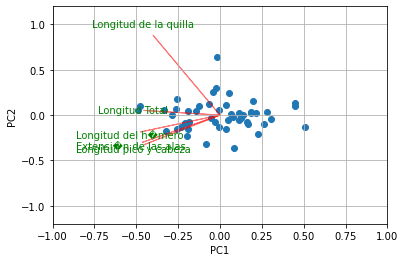

In [14]:
biplot(bird,1,2,my=0.2)

### ¿Cuantas componentes recomienda retener si requiero al menos el 90% de variabilidad total?

In [15]:
pcab.explained_inertia_

array([0.72319567, 0.10630082, 0.07728491, 0.0603131 , 0.0329055 ])

In [16]:
def var_acum(df,corr=True):
    cuanti=df.select_dtypes(np.number)
    nombres = cuanti.columns    
    
    pca=PCA(n_components=len(cuanti)) 
    
    if corr:
        pca_pipe = make_pipeline(StandardScaler(), PCA())
    else:
        pca_pipe = make_pipeline(PCA())
        
    pca_pipe.fit(cuanti)
    modelo_pca = pca_pipe.named_steps['pca']

    prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
    print('------------------------------------------')
    print('Porcentaje de varianza explicada acumulada')
    print('------------------------------------------')
    print(prop_varianza_acum)
    
    
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.plot(
        np.arange(len(cuanti.columns)) + 1,
        prop_varianza_acum,
        marker = 'o'
    )
    
    for x, y in zip(np.arange(len(cuanti.columns)) + 1, prop_varianza_acum):
        label = round(y, 2)
        ax.annotate(
            label,
            (x,y),
            textcoords="offset points",
            xytext=(0,10),
            ha='center'
        )
        
    ax.set_ylim(0, 1.19)
    ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
    ax.set_xlabel('Componente principal')
    ax.set_ylabel('Por. varianza acumulada')

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.72319567 0.82949648 0.90678139 0.9670945  1.        ]


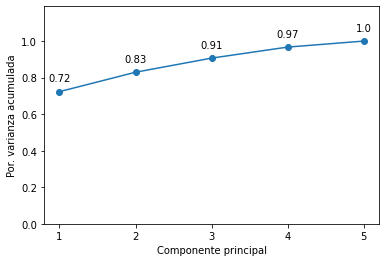

In [17]:
var_acum(bird)

### Haga ahora un análisis de componentes con la matriz de covarianzas.

In [18]:
matriz_birdc,componentes_bidc = matriz_componentes(bird,False)
matriz_birdc

,Longitud Total,Extensi�n de las alas,Longitud pico y cabeza,Longitud del h�mero,Longitud de la quilla
PC1,-0.536501,-0.829015,-0.096496,-0.074352,-0.100304
PC2,0.828100,-0.550512,0.033562,-0.014595,0.099234
PC3,0.156491,0.057744,-0.237515,-0.203245,-0.935123
PC4,0.040210,0.069022,-0.897627,-0.307241,0.305760
PC5,0.017652,-0.039642,-0.356953,0.926581,-0.110219


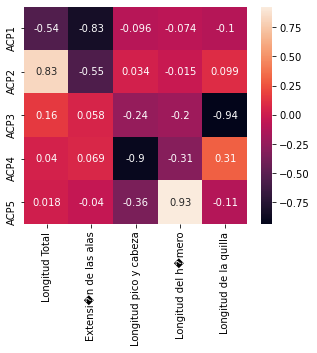

In [19]:
graf_componentes(bird,False)

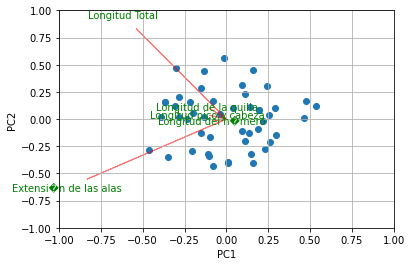

In [20]:
biplot(bird,1,2,corr=False)

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.86224654 0.97507355 0.99047327 0.99810783 1.        ]


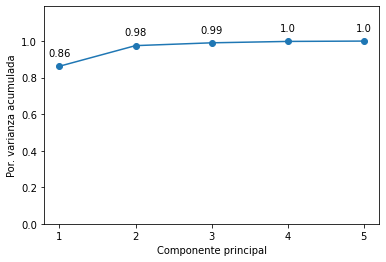

In [21]:
var_acum(bird,False)

## Información de 96 paises

In [22]:
url = 'D:/Maestria Analitica de Datos/Segundo Semestre/Metodos Estadisticos/bases/96paises.xlsx'
paises = pd.read_excel(url)
paises

,País,X 1,X 2,X 3,X 4,X 5,X 6,X 7,X 8,X 9,X 10,X 11
0,"1, Albania",1.0,30,41,2199,3903,12,94,53,0.0,341,1.2
1,"2, Angola",3.0,124,46,4422,955,6,57,19,0.7,89,0.5
2,"3, Arabia Saudi",4.3,21,13,133540,91019,96,497,1,0.0,4566,13.1
3,"4, Argelia",2.5,34,24,44609,19883,42,180,2,0.8,906,3.0
4,"5, Argentina",1.3,22,31,278431,65962,160,1043,22,0.1,1504,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...
91,"92, Venezuela",2.4,23,33,65382,73116,111,382,52,1.2,2186,5.7
92,"93, Vietnam",2.2,41,49,17634,12270,11,414,26,1.5,101,0.3
93,"94, Yemen",4.2,100,29,4044,2159,12,335,8,0.0,206,0.7
94,"95, Zambia",2.6,109,45,3605,7785,8,186,43,1.1,149,0.3


### Examine la correlación de las variables usando un gráfico de la matriz de correlación. Interprete sus resultados.

In [23]:
paisescorr=paises.corr(method='spearman')

<AxesSubplot:>

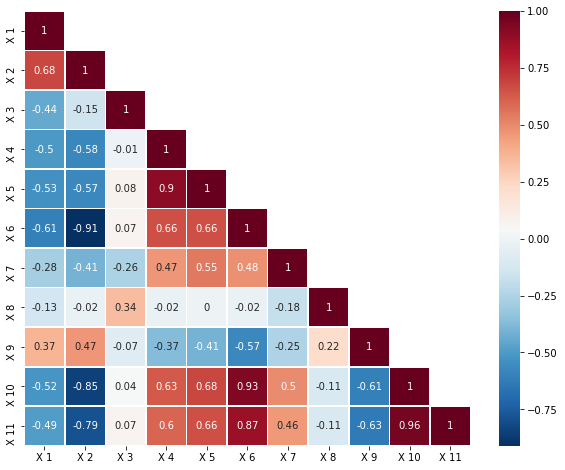

In [24]:
mask =np.triu(paisescorr, k=1)

fig, scatter = plt.subplots(figsize = (10,8))
sns.heatmap(data=paisescorr.round(decimals=2), 
            xticklabels=paisescorr.columns,
            yticklabels=paisescorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.6,
            mask=mask)

### Realice un análisis de componentes principales a partir de la matriz de correlaciones.

In [25]:
cuanti_p=paises.select_dtypes(np.number)
nombres_p = cuanti_p.columns

pcap = prince.PCA(
    n_components=len(cuanti_p.columns),
     n_iter=3,
     rescale_with_mean=True,
     rescale_with_std=True,
     copy=True,
     check_input=True,
     engine='auto'
 )
pcap = pcap.fit(cuanti_p)
pcap.transform(cuanti_p).head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.728909,-1.391262,-0.848172,0.073591,-0.500004,-0.807842,-0.726155,0.553296,0.372120,-0.009736,0.223374
1,-2.581830,-0.665293,0.017993,-0.913864,-0.702744,0.304117,1.771793,-0.632058,0.101403,0.190772,-0.095230
2,0.397583,3.723023,0.309690,-1.554744,1.044874,0.035541,-0.533487,0.500188,0.170540,0.086367,0.047422
3,-1.142095,1.391250,0.111441,-0.515864,-0.190461,0.837117,-1.064647,0.149318,0.148554,0.216248,-0.118618
4,0.493421,0.534342,0.822032,0.647715,-0.343150,-0.219578,-0.783099,-0.261969,0.357345,-0.231232,0.126235


### Realice el gráfico de sedimentación y un gráfico que muestre la varianza acumulada por cada componente.

In [26]:
def graf_sed(df,corr=True):
    
    cuanti=paises.select_dtypes(np.number)
    nombres= cuanti.columns
    
    pcaa = prince.PCA(
        n_components=len(cuanti.columns),
         n_iter=3,
         rescale_with_mean=corr,
         rescale_with_std=corr,
         copy=True,
         check_input=True,
         engine='auto'
     )
    pcaa = pcaa.fit(cuanti)
        
    # Porcentaje de varianza explicada por cada componente
    # ==============================================================================
    print('-------------------------')
    print('Gráfico de sedimentación')
    print('-------------------------')

    
    
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.bar(
        x      = np.arange(len(cuanti.columns)) + 1,
        height = list(pcaa.eigenvalues_)
    )
    
    for x, y in zip(np.arange(len(cuanti.columns)) + 1, list(pcaa.eigenvalues_)):
        label = round(y, 2)
        ax.annotate(
            label,
            (x,y),
            textcoords="offset points",
            xytext=(0,10),
            ha='center'
        )
    
    ax.set_xticks(np.arange(len(cuanti.columns)) + 1)
    ax.set_ylim(0, 0.5 + list(pcaa.eigenvalues_)[0])
    ax.set_xlabel('Componente principal')
    ax.set_ylabel('Autovalores');


-------------------------
Gráfico de sedimentación
-------------------------


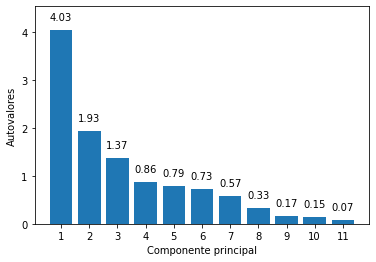

In [27]:
graf_sed(paises)

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.36635264 0.54180645 0.66638928 0.74498164 0.81717624 0.88346715
 0.93540398 0.96511315 0.9803921  0.99369467 1.        ]


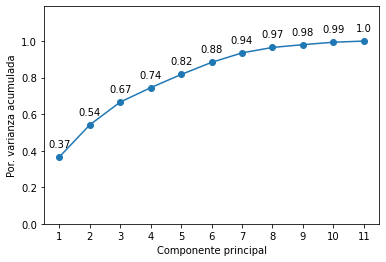

In [28]:
var_acum(paises)

### Interprete las dos primeras componentes.

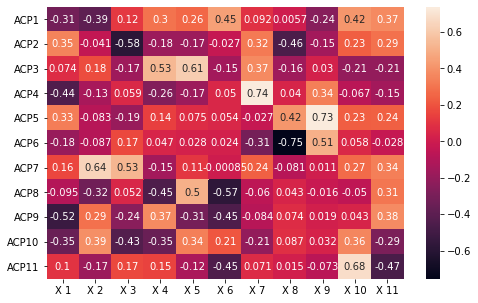

In [29]:
graf_componentes(paises,True,8,5)

### Grafique los datos en un plano adecuado.

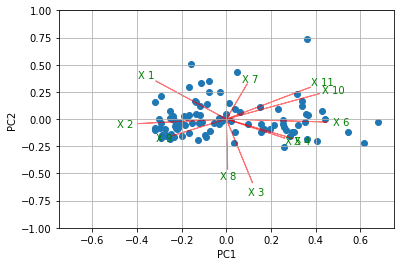

In [30]:
biplot(paises,1,2,corr=True,mx=-0.25)

## Base acuicultura

In [31]:
url = 'D:/Maestria Analitica de Datos/Segundo Semestre/Metodos Estadisticos/bases/acuicultura.xls'
ccultura = pd.read_excel(url)


ccultura['PISCINA'] = pd.Categorical(ccultura['PISCINA'])
ccultura['dia'] = pd.Categorical(ccultura['dia'])

cuanti_cc=ccultura.select_dtypes(np.number)
nombres_cc = cuanti_cc.columns
ccultura

,PISCINA,dia,OXIGESUP,OXIGEFON,TEMPSUP,TEMPFON,SALINSUP,SALINFON,TRANSP,NIVEL
0,2,1,5.200000,4.800000,29.666667,29.000000,7.666667,7.666667,0.383333,-73.666667
1,2,2,4.466667,4.133333,29.666667,29.000000,8.000000,8.000000,0.333333,-11.333333
2,2,3,4.533333,4.200000,30.000000,29.000000,9.000000,9.000000,0.343333,-4.333333
3,2,4,5.066667,4.533333,29.666667,28.666667,10.000000,10.000000,0.250000,-6.000000
4,2,5,4.133333,3.866667,29.000000,28.000000,12.000000,12.000000,0.233333,-9.000000
...,...,...,...,...,...,...,...,...,...,...
147,20,34,11.400000,8.433333,31.500000,30.500000,20.000000,20.000000,0.375000,-1.666667
148,20,35,9.900000,7.283333,31.833333,30.500000,18.500000,18.500000,0.691667,-3.333333
149,20,36,9.166667,7.533333,32.166667,30.666667,18.000000,17.833333,0.725000,0.000000
150,20,37,8.400000,7.000000,34.000000,31.666667,17.000000,17.000000,0.741667,-2.500000


In [32]:
ccultura['dia'].unique()

[1, 2, 3, 4, 5, ..., 34, 35, 36, 37, 38]
Length: 38
Categories (38, int64): [1, 2, 3, 4, ..., 35, 36, 37, 38]

### Debería hacerse un PCA en la matriz de covarianzas o correlaciones.

In [33]:
pcac = prince.PCA(
     n_components=len(nombres_cc),
     n_iter=3,
     rescale_with_mean=True,
     rescale_with_std=True,
     copy=True,
     check_input=True,
     engine='auto'
 )
pcac = pcac.fit(ccultura)
pcac.transform(ccultura).head()

,0,1,2,3,4,5,6,7
0,-2.840911,3.553187,0.912696,4.289093,-1.120842,-1.194484,-0.100540,-0.302768
1,-2.340781,1.931761,-0.444813,-0.104801,1.000148,0.367855,0.121289,-0.252923
2,-2.050296,1.507281,-0.577722,-0.489737,1.248483,0.526413,0.225095,-0.148412
3,-2.121621,1.432608,-1.050313,-0.500552,0.745312,0.251273,0.234393,-0.112015
4,-2.763437,0.857393,-1.351163,-0.335295,0.382486,-0.227166,0.049029,-0.047896


In [34]:
pcacc = prince.PCA(
     n_components=len(nombres_cc),
     n_iter=3,
     rescale_with_mean=False,
     rescale_with_std=False,
     copy=True,
     check_input=True,
     engine='auto'
 )
pcacc = pcacc.fit(ccultura)
pcacc.transform(ccultura).head()

,0,1,2,3,4,5,6,7
0,51.949233,63.521374,21.870792,7.089401,-7.560099,-0.656654,-0.887817,-0.096965
1,40.904774,12.217819,-1.249826,-9.977148,9.915802,0.789058,-0.356795,-0.164089
2,40.757875,5.798216,-3.579924,-12.071923,10.916791,0.657402,-0.308924,0.050103
3,41.740760,6.278340,-2.455020,-11.467709,9.208894,-0.150692,-0.320148,0.015291
4,42.856730,7.755449,-1.405294,-11.338187,5.254015,-0.031413,-0.324905,0.047938


### Después de hacer el ACP ¿Cuántas componentes principales se requieren para describir los datos?

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.42803318 0.71207127 0.86039716 0.95623608 0.99237221 0.99747797
 0.99999952 1.        ]


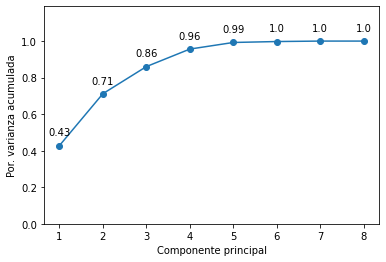

In [35]:
var_acum(ccultura)

### Haga un biplot e interprete

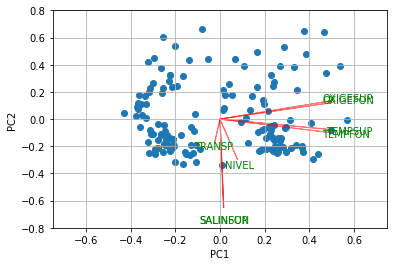

In [37]:
biplot(ccultura,1,2,corr=True,mx=-0.25,my=-0.2)